## Imports and Functions

We begin by loading the necessary packages/modules.

In [1]:
import os
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

## Initialization

We define the file paths and load them onto separate dataframes.

In [2]:
gamma_estimates_csv = os.path.join('..', 'models', 'liq_param', 'liq_summary.csv')
adtv_csv = os.path.join('..', 'data', 'processed', 'summary_data.csv')

# load the relevant columns
gamma_df = pd.read_csv(gamma_estimates_csv, usecols=['Ticker', 'Mean Gamma Estimate'])
adtv_df = pd.read_csv(adtv_csv, usecols=['Ticker', 'ADTV'])

## Running the Regression

We perform a linear regression to calculate the intercept and slope estimates to derive the liquidity parameter from ADTV values.

In [3]:
# calc logs
gamma_df['log_gamma'] = np.log10(gamma_df['Mean Gamma Estimate'])
adtv_df['log_adtv'] = np.log10(adtv_df['ADTV'])

# merge on ticker
merged_df = pd.merge(gamma_df, adtv_df, on='Ticker')

# fit model
result = ols(formula="log_gamma ~ log_adtv", data=merged_df).fit()

# print results
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              log_gamma   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     55.26
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           4.95e-06
Time:                        17:27:56   Log-Likelihood:                -21.353
No. Observations:                  15   AIC:                             46.71
Df Residuals:                      13   BIC:                             48.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5429      1.034     -0.525      0.6

c:\Users\Diana\miniforge3\envs\riskmanagement\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [4]:
# extract estimates
a_hat = result.params['Intercept']
b_hat = result.params['log_adtv']

print(f'Estimated intercept a: {a_hat}')
print(f'Estimated slope b: {b_hat}')

Estimated intercept a: -0.5428665124749155
Estimated slope b: -1.494956715216012


## Displaying Regression Results

We display the regression results in a plot.

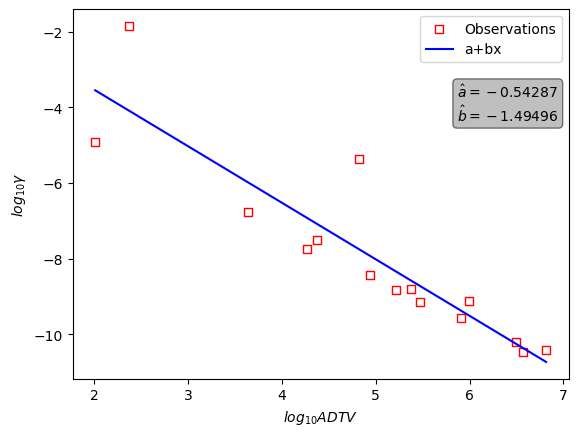

In [5]:
# plot observations
plt.scatter(merged_df['log_adtv'], merged_df['log_gamma'], label='Observations', marker='s', color='w', edgecolors='r')

# generate ADTV values to predict on
adtv_range = np.linspace(merged_df['log_adtv'].min(), merged_df['log_adtv'].max(), 100)

# predict gamma
predicted_gamma = a_hat + b_hat * adtv_range

# plot
plt.plot(adtv_range, predicted_gamma, label='a+bx', color='blue')
plt.xlabel('$log_{10}ADTV$')
plt.ylabel('$log_{10}\\gamma$')

plt.legend()

ax = plt.gca()
textstr = f'$\\hat{{a}} = {a_hat:.5f}$\n$\\hat{{b}} = {b_hat:.5f}$'
props = dict(boxstyle='round', facecolor='gray', alpha=0.5)

ax.text(0.775, 0.8, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.savefig(os.path.join('..', 'reports', 'figures', 'adtv_reg.svg'), bbox_inches='tight')
plt.show()